In [3]:
library(cpbnplot)

- RNA-Seq data of specimens from bladder cancer deposited in Gene Expression Omnibus database (GSE133624) was used for demonstrative purpose.
- Chen X, Li A, Sun BF, Yang Y, Han YN, Yuan X, Chen RX, Wei WS, Liu Y, Gao CC, Chen YS, Zhang M, Ma XD, Liu ZW, Luo JH, Lyu C, Wang HL, Ma J, Zhao YL, Zhou FJ, Huang Y, Xie D, Yang YG. 5-methylcytosine promotes pathogenesis of bladder cancer through stabilizing mRNAs. Nat Cell Biol. 2019 Aug;21(8):978-990. doi: 10.1038/s41556-019-0361-y. Epub 2019 Jul 29. PMID: 31358969.

In [4]:
counts = read.table("data/GSE133624_reads-count-all-sample.txt", header=1, row.names=1)
meta = data.frame(sapply(colnames(counts), function (x) substring(x,1,1)))
colnames(meta) = c("Condition")

### Identify DEGs using DESeq2

In [5]:
library(DESeq2)
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = meta,
                              design= ~ Condition)
filt <- rowSums(counts(dds) < 10) > dim(meta)[1]*0.9
dds <- dds[!filt,]
dds = DESeq(dds)

 要求されたパッケージ S4Vectors をロード中です 

 要求されたパッケージ stats4 をロード中です 

 要求されたパッケージ BiocGenerics をロード中です 

 要求されたパッケージ parallel をロード中です 



Error in setMethod("path", cl, where = topenv(parent.frame()), function(object,  : 
  the environment ‘base’ is locked; cannot assign methods for function ‘path’



 次のパッケージを付け加えます: ‘BiocGenerics’ 


 以下のオブジェクトは ‘package:parallel’ からマスクされています: 

     clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB 


 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     IQR, mad, sd, var, xtabs 


 以下のオブジェクトは ‘package:base’ からマスクされています: 

     anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min 



 次のパッケージを付け加えます: ‘S4Vectors’ 


 以下のオブジェクトは ‘package:base’ からマスクされています: 

     expand.grid, I, unname 


 要求されたパッケージ IRanges をロード中です 

 要求されたパッケージ GenomicRanges をロード中です 

 要求されたパッケージ GenomeInfoDb をロード中です 

 要求されたパッケージ Summar

In [6]:
res = results(dds, pAdjustMethod = "bonferroni")
sig = subset(res, padj<0.05)
vsted = assay(vst(dds, blind=T))

In [7]:
library(org.Hs.eg.db)
cand.entrez = clusterProfiler::bitr(rownames(sig), fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)$ENTREZID
pway = ReactomePA::enrichPathway(gene = cand.entrez)
pway = enrichplot::pairwise_termsim(pway)
## Define including samples
incSample = rownames(subset(meta, Condition=="T"))

 要求されたパッケージ AnnotationDbi をロード中です 

'select()' returned 1:many mapping between keys and columns

Warning message in clusterProfiler::bitr(rownames(sig), fromType = "ENSEMBL", toType = "ENTREZID", :
“13.46% of input gene IDs are fail to map...”


In [8]:
options(warn=-1, repr.plot.width=10, repr.plot.height=10)

### Plotting using cpbnplot

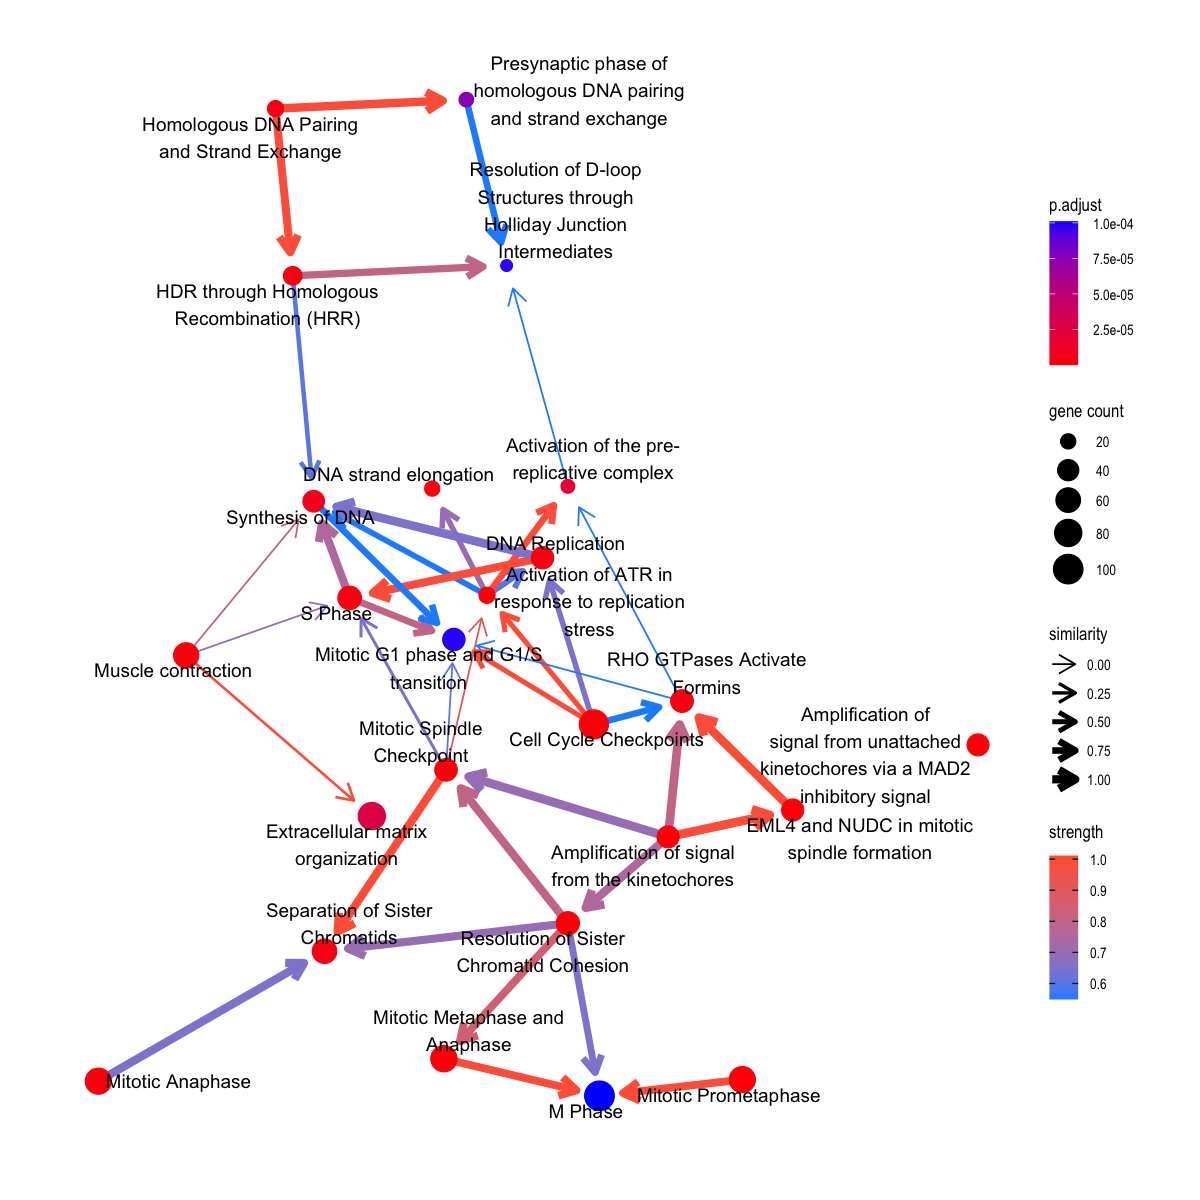

In [9]:
suppressMessages(bnpathplot(pway, vsted,
         expSample=incSample,
         algo="tabu", nCategory=25,
         qvalueCutOff=0.05, interactive=F, labelSize=4))

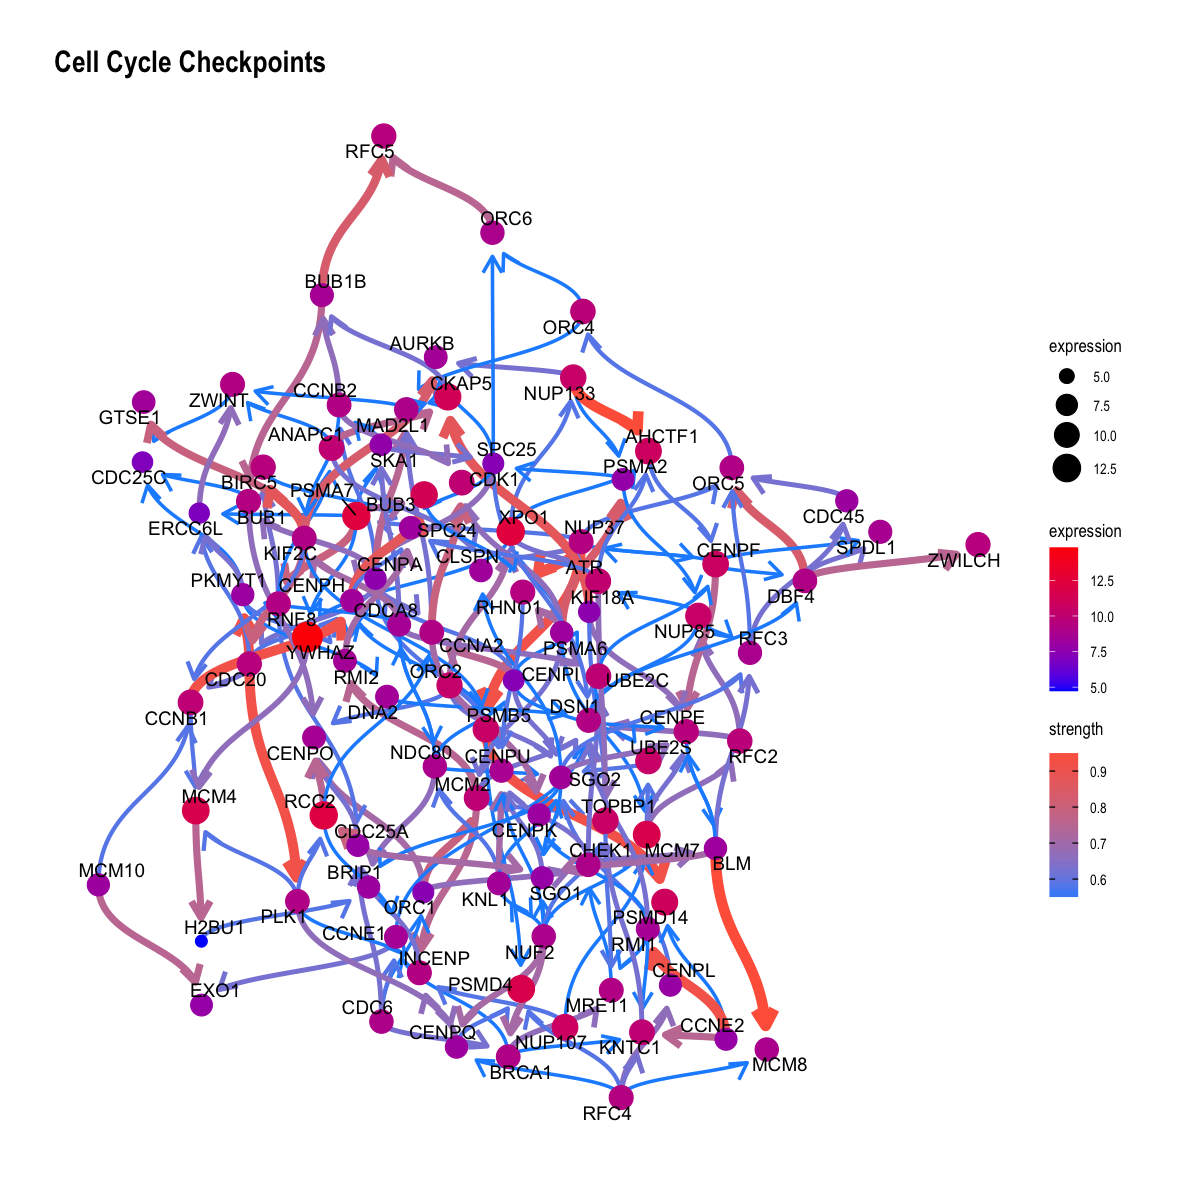

In [10]:
library(parallel)
cl <- makeCluster(6)
suppressMessages(bngeneplot(pway, vsted,
                expSample=incSample,
         algo="hc", pathNum=1, cl=cl,
         interactive=F, labelSize=4))

In [11]:
# Interactive mode using bnviewer
# suppressMessages(bnpathplot(pway, vsted,
#          candidateRows=rownames(subset(meta, Condition=="T")),
#          algo="hc", nCategory=25,
#          qvalueCutOff=0.05, interactive=T))

In [11]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Mojave 10.14.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] org.Hs.eg.db_3.13.0         AnnotationDbi_1.54.1       
 [3] DESeq2_1.32.0               SummarizedExperiment_1.22.0
 [5] Biobase_2.52.0              MatrixGenerics_1.4.0       
 [7] matrixStats_0.59.0          GenomicRanges_1.44.0       
 [9] GenomeInfoDb_1.28.1         IRanges_2.26.0             
[11] S4Vectors_0.30.0            BiocGenerics_0.38.0        
[13] cpbnplot_0.99.0            

loaded via a namespace (and not attached):
  [1] backports_1.2.1            